<a href="https://colab.research.google.com/github/LeonieFetzer/DHBW_kNN_Gruppe-3/blob/main/kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datensatz

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv('telefonkunden.csv')

Saving telefonkunden.csv to telefonkunden (1).csv


In [ ]:
# Datenüberblick
print("Anzahl Zeilen, Spalten:", df.shape)
print("Spaltennamen:", df.columns.tolist())
print(df.head(5))  # Erste 5 Zeilen zur schnellen Prüfung

# Fehlende Werte prüfen
print("\nFehlende Werte pro Spalte:\n", df.isnull().sum())

# Features (X) und Zielvariable (y) trennen
X = df.drop('custcat', axis=1)
y = df['custcat']

# Label-Encoding für kategoriale Features
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = label_encoder.fit_transform(X[col])
        # Ausgabe, um zu sehen, wie Kategorien kodiert werden
        print(f"Label-Encoding '{col}': {label_encoder.classes_}")

# Skalierung der Features (wichtig für kNN)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.astype(float))
print("\nBeispiel-Werte nach Skalierung (erste 5 Zeilen):")
print(X_scaled[:5])

Anzahl Zeilen, Spalten: (1000, 12)
Spaltennamen: ['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside', 'custcat']
   region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      13   44        1        9    64.0   4       5     0.0       0   
1       3      11   33        1        7   136.0   5       5     0.0       0   
2       3      68   52        1       24   116.0   1      29     0.0       1   
3       2      33   33        0       12    33.0   2       0     0.0       1   
4       2      23   30        1        9    30.0   1       2     0.0       0   

   reside  custcat  
0       2        1  
1       6        4  
2       2        3  
3       1        1  
4       4        3  

Fehlende Werte pro Spalte:
 region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

Beispiel-Werte nach Skalieru

# Aufteilung Datensatz

In [ ]:
from sklearn.model_selection import train_test_split

# Datensatz aufteilen in 80% Training und 20% Test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

#Parameter der Daten ausgeben
print("Trainingsdaten:", X_train.shape, "Trainingslabels:", y_train.shape)
print("Testdaten:", X_test.shape, "Testlabels:", y_test.shape)

Trainingsdaten: (800, 11) Trainingslabels: (800,)
Testdaten: (200, 11) Testlabels: (200,)


# k-Nearest Neighbors (kNN)

Optimaler k-Wert laut Cross-Validation: 17 (Durchschnittliche Genauigkeit = 0.393)


<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Cross-Validation Accuracy in Abhängigkeit von k')

Text(0.5, 0, 'Anzahl Nachbarn (k)')

Text(0, 0.5, 'Mittlere Accuracy (5-Fold CV)')

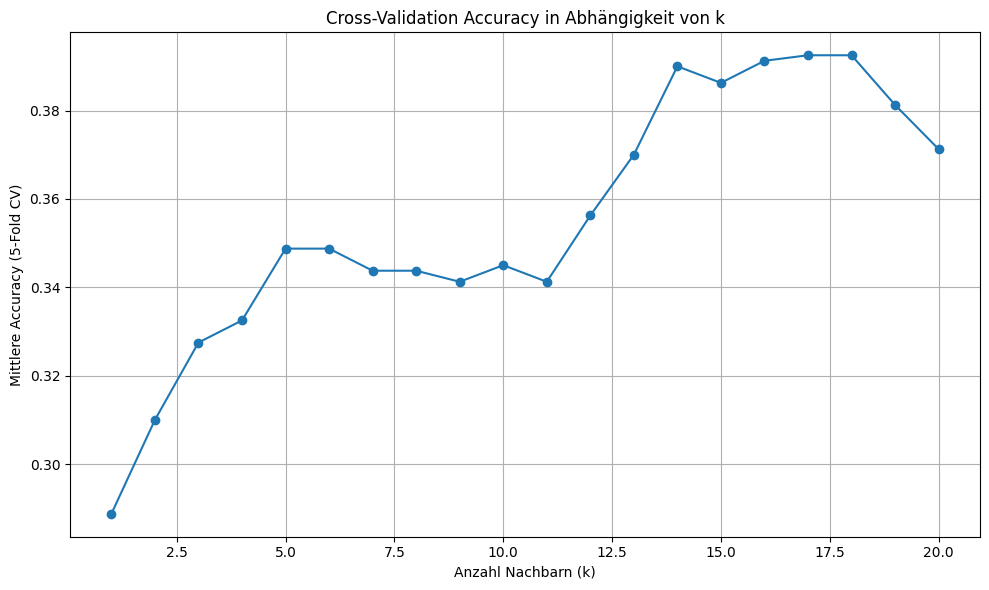

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Hyperparameter-Optimierung: Bestes k finden über 5-fache Kreuzvalidierung
k_values = list(range(1, 21))
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Für jedes k: mittlere Accuracy über 5 CV-Folds berechnen
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Bestes k-Wert laut CV herausfinden
best_score = max(cv_scores)
best_k = k_values[cv_scores.index(best_score)]
print(f"Optimaler k-Wert laut Cross-Validation: {best_k} (Durchschnittliche Genauigkeit = {best_score:.3f})")

# Ergebnisse visualisieren
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o')
plt.title('Cross-Validation Accuracy in Abhängigkeit von k')
plt.xlabel('Anzahl Nachbarn (k)')
plt.ylabel('Mittlere Accuracy (5-Fold CV)')
plt.grid(True)
plt.tight_layout()
plt.show()

Optimaler k-Wert laut Testset: 6 (Testgenauigkeit = 0.400)


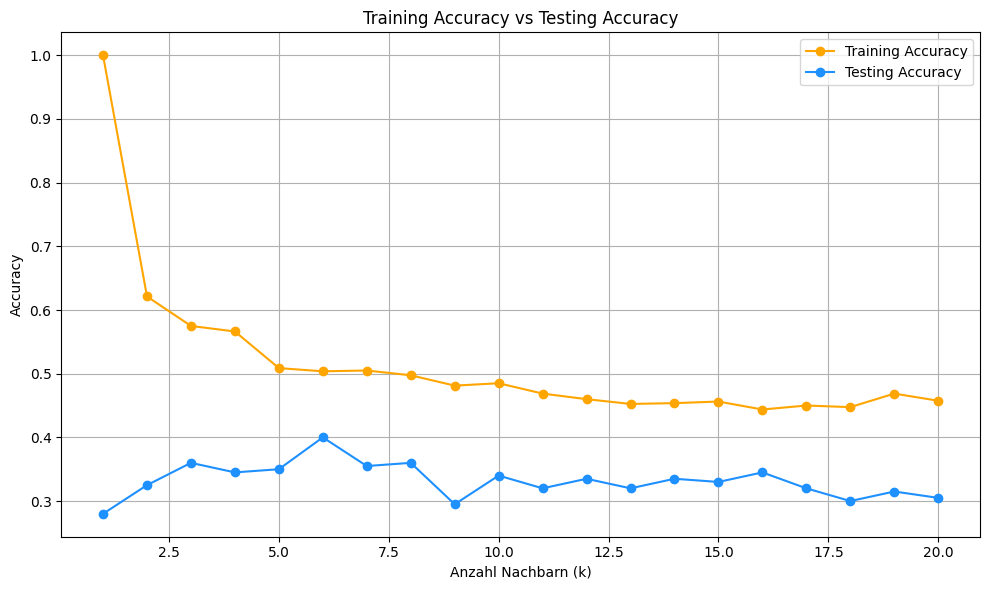

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Liste der getesteten k-Werte (Anzahl Nachbarn)
k_values = list(range(1, 21))
train_accuracies = []  # Speichert Genauigkeit auf Trainingsdaten
test_accuracies = []   # Speichert Genauigkeit auf Testdaten

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Accuracy auf Trainingsdaten messen
    train_acc = accuracy_score(y_train, knn.predict(X_train))
    # Accuracy auf Testdaten messen
    test_acc = accuracy_score(y_test, knn.predict(X_test))

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Bestes k basierend auf der Testgenauigkeit ermitteln
best_score_test = max(test_accuracies)
best_k_test = k_values[test_accuracies.index(best_score_test)]
print(f"Optimaler k-Wert laut Testset: {best_k_test} (Testgenauigkeit = {best_score_test:.3f})")

# Ergebnisse visualisieren
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, label='Training Accuracy', marker='o', color='orange')
plt.plot(k_values, test_accuracies, label='Testing Accuracy', marker='o', color='dodgerblue')
plt.xlabel('Anzahl Nachbarn (k)')
plt.ylabel('Accuracy')
plt.title('Training Accuracy vs Testing Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Festlegung des k-Werts, der getestet werden soll
k = 6
knn = KNeighborsClassifier(n_neighbors=k)

# Training des Modells auf dem Trainingsdatensatz
knn.fit(X_train, y_train)

# Kreuzvalidierung (5-fach), um eine robustere Einschätzung der Modellgüte zu bekommen
cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
cv_mean = cv_scores.mean()

# Berechnung von Accuracy auf Trainings- und Testdaten
train_acc = accuracy_score(y_train, knn.predict(X_train))
test_acc = accuracy_score(y_test, knn.predict(X_test))

print(f"Cross-Validation Accuracy (Mittelwert): {cv_mean:.4f}")
print(f"Genauigkeit auf Trainingsdaten: {train_acc:.4f}")
print(f"Genauigkeit auf Testdaten: {test_acc:.4f}")

KNeighborsClassifier(n_neighbors=6)

Cross-Validation Accuracy (Mittelwert): 0.3488
Genauigkeit auf Trainingsdaten: 0.5038
Genauigkeit auf Testdaten: 0.4000


In [ ]:
# Vorhersage auf Testdaten
y_pred = knn.predict(X_test)

# Evaluierung

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix – kNN (k = 6, Accuracy = 0.400)')

Text(0.5, 36.72222222222221, 'Vorhergesagt')

Text(70.72222222222221, 0.5, 'Tatsächlich')

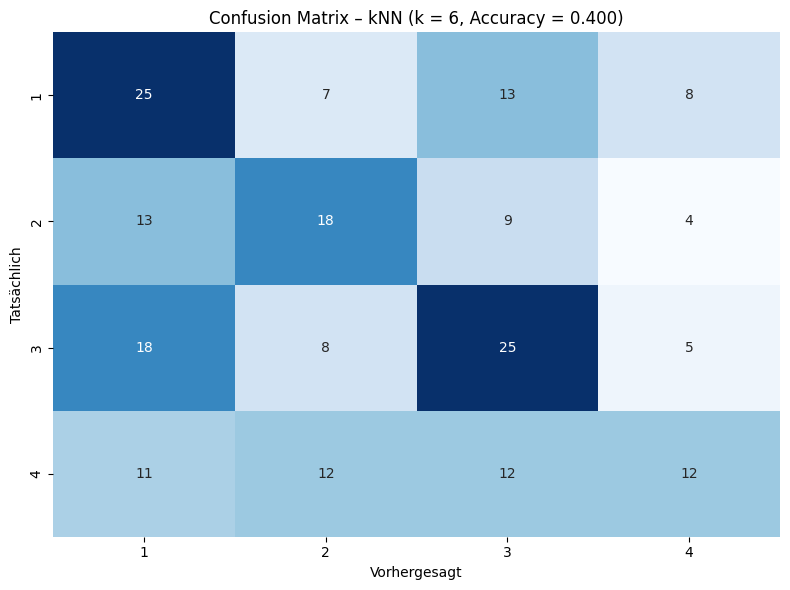

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Genauigkeit berechnen
accuracy = accuracy_score(y_test, y_pred)

# Confusion-Matrix berechnen
cm = confusion_matrix(y_test, y_pred)

labels = sorted(y.unique())

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=labels, yticklabels=labels)

#Heatmap
plt.title(f'Confusion Matrix – kNN (k = {k}, Accuracy = {accuracy:.3f})')
plt.xlabel('Vorhergesagt')
plt.ylabel('Tatsächlich')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Precision, Recall, F1-Score pro Klasse – kNN')

Text(0.5, 36.72222222222221, 'Metrik')

Text(95.72222222222221, 0.5, 'Klasse')

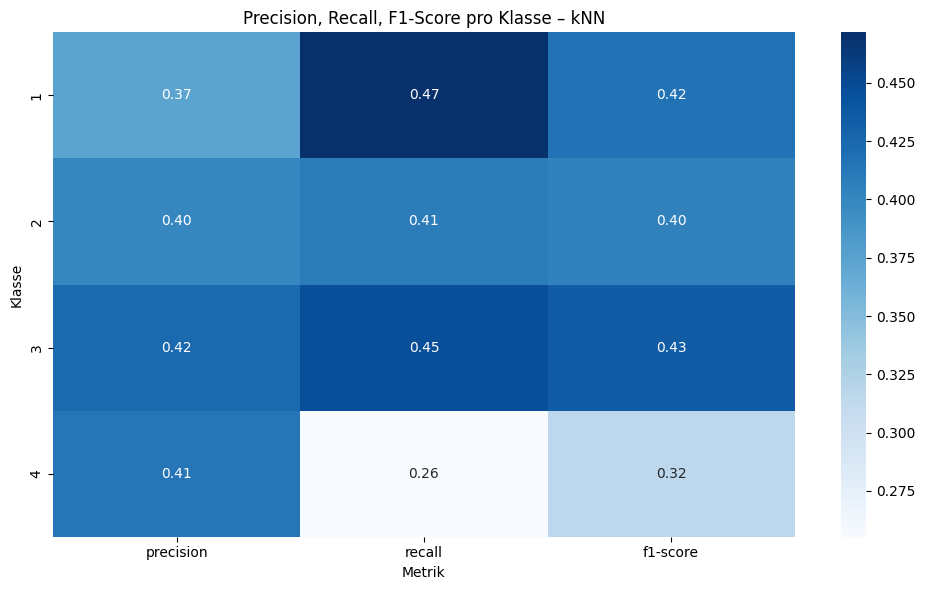

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

# Classification Report als Dictionary extrahieren
report = classification_report(y_test, y_pred, output_dict=True)

# Nur numerische Klassen extrahieren
metrics_df = pd.DataFrame({label: metrics for label, metrics in report.items() if label.isdigit()}).T

# Nur relevante Spalten behalten
metrics_df = metrics_df[['precision', 'recall', 'f1-score']]

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(metrics_df, annot=True, cmap='Blues', fmt=".2f")
plt.title("Precision, Recall, F1-Score pro Klasse – kNN")
plt.xlabel("Metrik")
plt.ylabel("Klasse")
plt.tight_layout()
plt.show()

SelectKBest(k='all')

<Figure size 1000x600 with 0 Axes>

<BarContainer object of 11 artists>

Text(0.5, 0, 'F-Score')

Text(0.5, 1.0, 'Feature Importance – kNN')

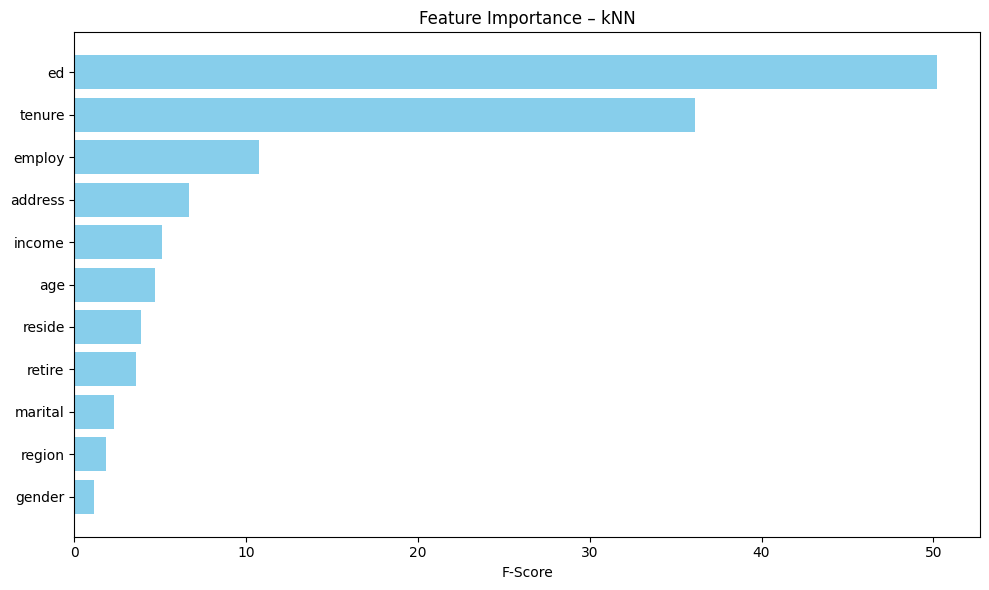

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd
import matplotlib.pyplot as plt

# Feature Selection mit ANOVA F-Test
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_train, y_train)

# Ergebnisse als sortiertes DataFrame
feature_df = pd.DataFrame({
    'Feature': X.columns,
    'F-Score': selector.scores_
}).sort_values(by='F-Score', ascending=False)

# Ergebnisse visualisieren
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['F-Score'], color='skyblue')
plt.xlabel('F-Score')
plt.title('Feature Importance – kNN')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()